In [19]:
!python -m pip install --upgrade pip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

In [3]:
data = pd.read_csv(r'C:\Users\Parth Koli\Downloads\Python libraries project\employees.csv', encoding='unicode_escape')

In [4]:
data.shape

(1000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
pd.isnull(data).sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(764, 8)

In [9]:
pd.isnull(data).sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [10]:
data=data.rename(columns={'Bonus %':'Bonus'})

In [11]:
data.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus', 'Senior Management', 'Team'],
      dtype='object')

In [12]:
data.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus', 'Senior Management', 'Team'],
      dtype='object')

Text(0.5, 1.0, 'Male and Female Gender Ratio')

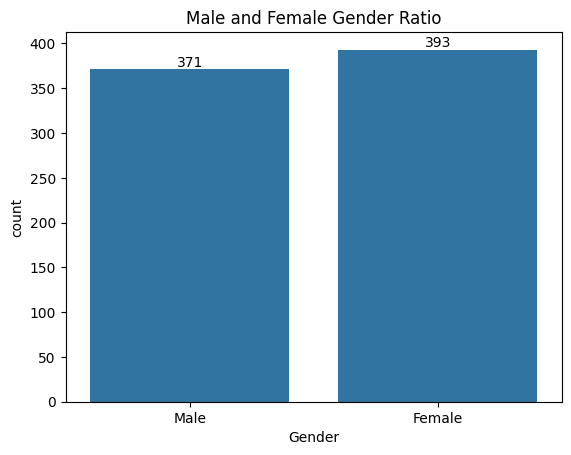

In [13]:
val=sb.countplot(x='Gender',data=data)
for bars in val.containers:
    val.bar_label(bars)
mp.title('Male and Female Gender Ratio')

Text(0.5, 1.0, 'Average Bonus Ratio among Gender')

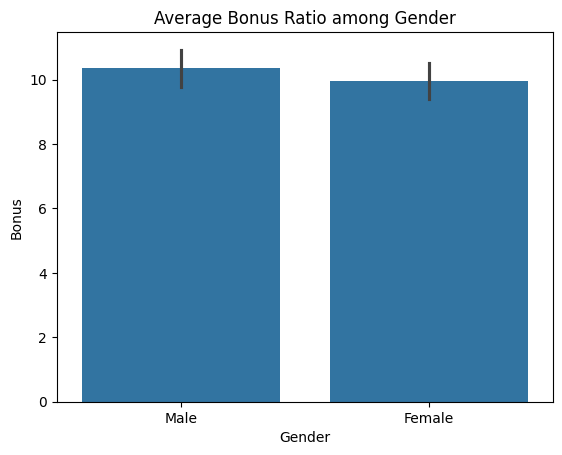

In [14]:
sb.barplot(x='Gender',y='Bonus',data=data)
mp.title('Average Bonus Ratio among Gender')

Text(0.5, 1.0, 'Average Salary among Teams')

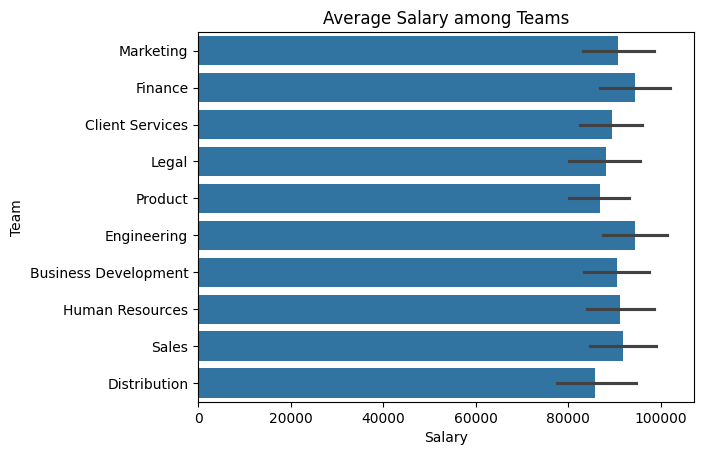

In [15]:
sb.barplot(x='Salary',y='Team',data=data)
mp.title('Average Salary among Teams')

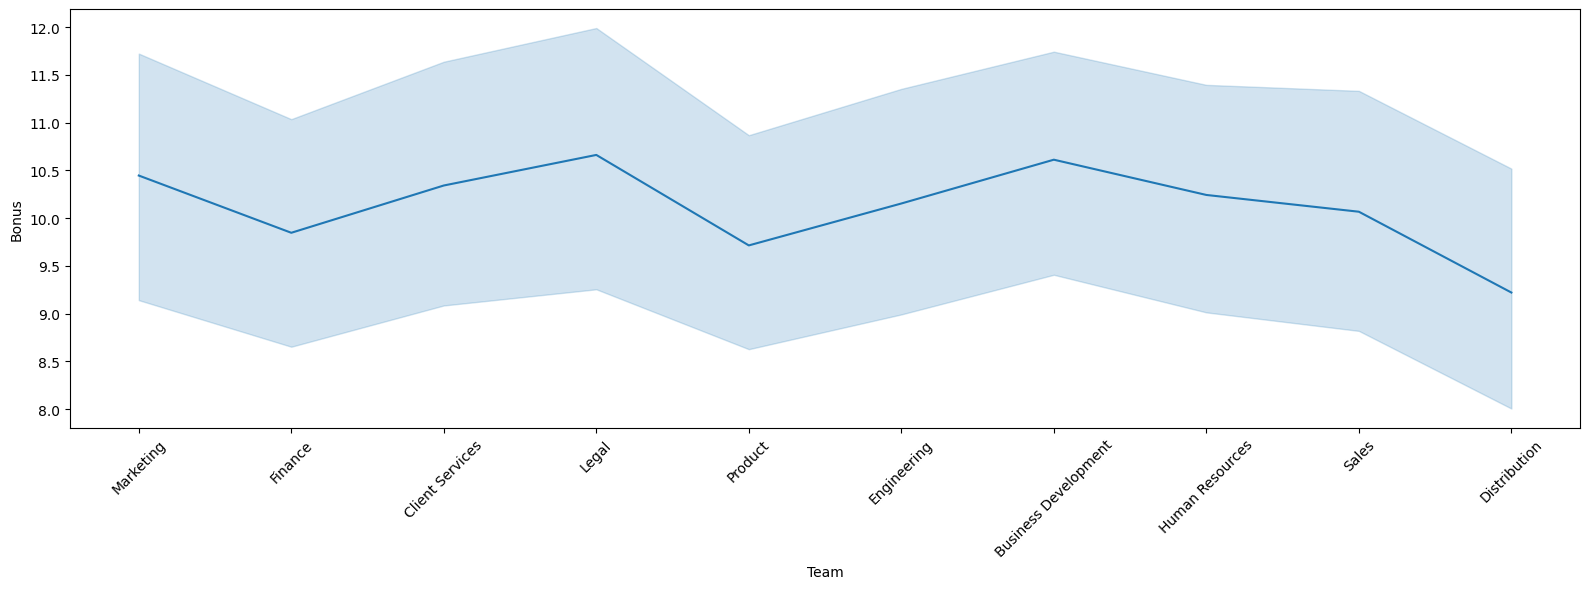

In [16]:
sb.lineplot(x='Team', y='Bonus', data=data); mp.gcf().set_size_inches(16, 6); mp.xticks(rotation=45); mp.tight_layout(); mp.show()

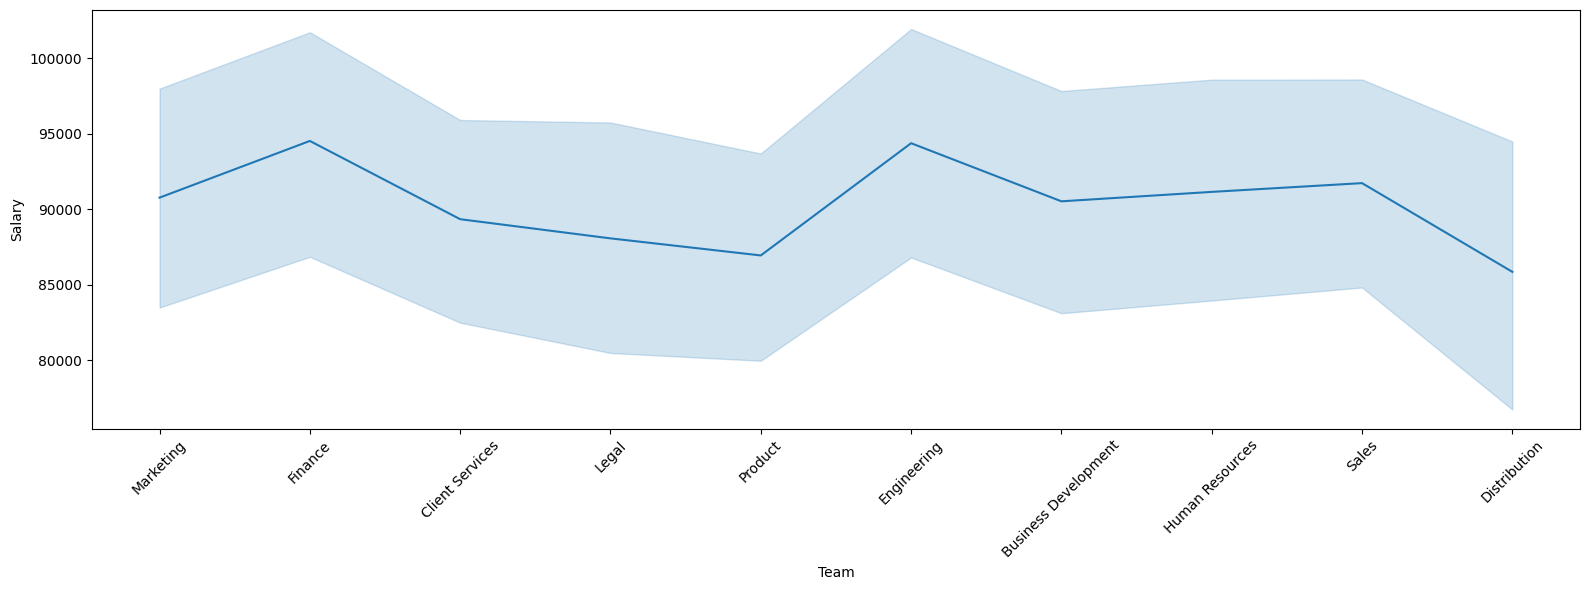

In [17]:
sb.lineplot(x='Team', y='Salary', data=data); mp.gcf().set_size_inches(16, 6); mp.xticks(rotation=45); mp.tight_layout(); mp.show()

(np.float64(-1.0999998124357417),
 np.float64(1.0999999910683687),
 np.float64(-1.099999735684437),
 np.float64(1.0999999524722524))

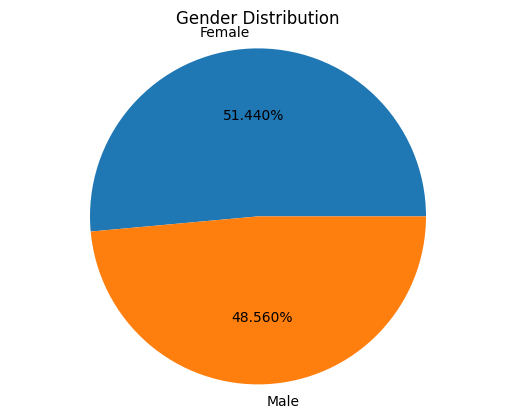

In [18]:
gender_counts = data['Gender'].value_counts()
mp.pie(gender_counts, labels=gender_counts.index, autopct='%1.3f%%')
mp.title('Gender Distribution')
mp.axis('equal')

(np.float64(-1.0999999313321267),
 np.float64(1.0999999967301013),
 np.float64(-1.0999999631040231),
 np.float64(1.0999998162577542))

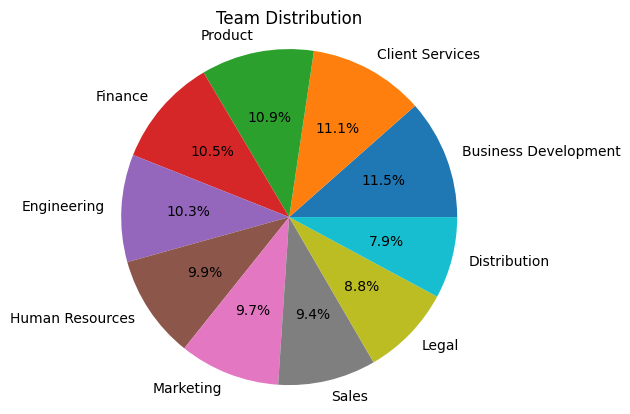

In [19]:
team_counts = data['Team'].value_counts()
mp.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
mp.title('Team Distribution')
mp.axis('equal')

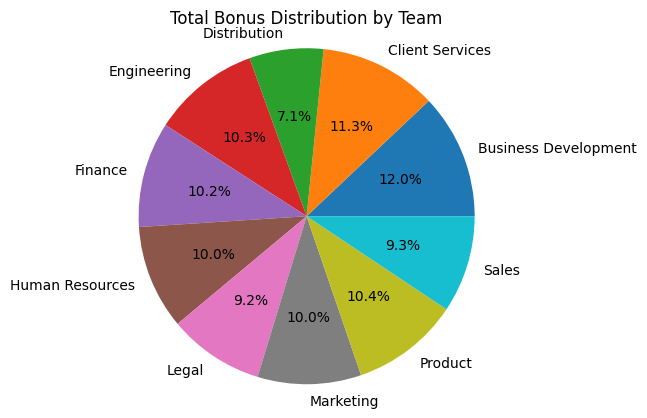

In [20]:
team_bonus = data.groupby('Team')['Bonus'].sum()

mp.pie(team_bonus, labels=team_bonus.index, autopct='%1.1f%%')
mp.title('Total Bonus Distribution by Team')
mp.axis('equal')
mp.show()


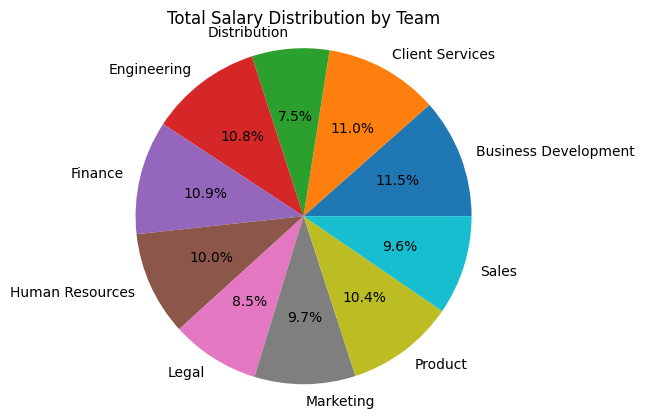

In [21]:
team_salary=data.groupby('Team')['Salary'].sum()
mp.pie(team_salary,labels=team_salary.index,autopct='%1.1f%%')
mp.title('Total Salary Distribution by Team')
mp.axis('equal')
mp.show()

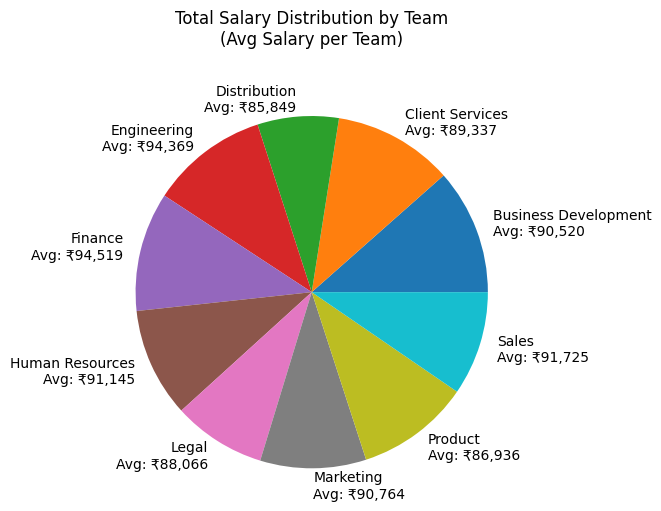

In [22]:
mp.figure(figsize=(5, 5))  
team_salary = data.groupby('Team')['Salary'].sum()
team_avg_salary = data.groupby('Team')['Salary'].mean()
labels = [f'{team}\nAvg: ₹{avg_salary:,.0f}' for team, avg_salary in team_avg_salary.items()]
mp.pie(team_salary, labels=labels)
mp.title('Total Salary Distribution by Team\n(Avg Salary per Team)', pad=40)  # pad pushes title up
mp.axis('equal')
mp.show()


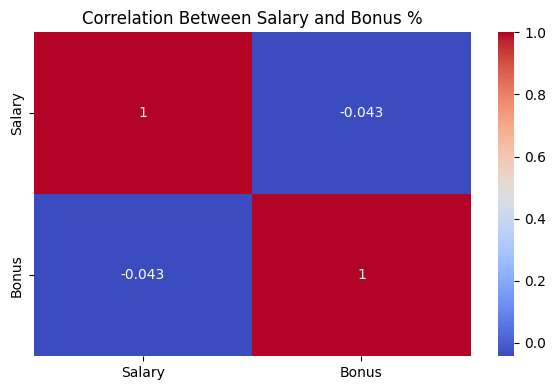

In [23]:
corr = data[['Salary', 'Bonus']].corr()
mp.figure(figsize=(6, 4))
sb.heatmap(corr, annot=True, cmap='coolwarm')
mp.title('Correlation Between Salary and Bonus %')
mp.tight_layout()
mp.show()

Text(0.5, 1.0, 'Average Salary Ratio among Gender')

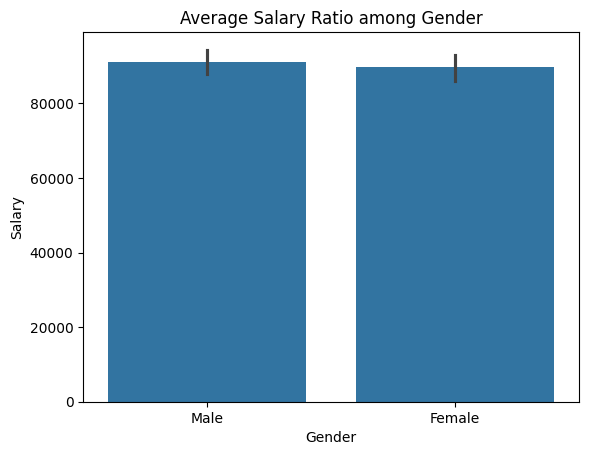

In [24]:
sb.barplot(x='Gender',y='Salary',data=data)
mp.title('Average Salary Ratio among Gender')